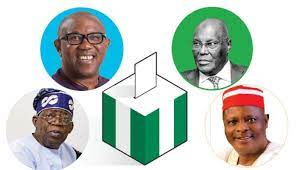

# <p style="background-color:#008000; font-family:newtimeroman; color:#FFF9ED; font-size:250%; text-align:center; border-radius:8px 50px;">NIGERIA'S ELECTION 2023</p>

## <p style= "font-family:newtimeroman; color:#008000; font-size:150%; text-align:center; border-radius:8px 50px;">(Data Mining Process))</p>

<p style="font-weight: bold; font-size:30px; color:green; text-align:justify">Introduction</p>
Nigeria is western African country regarded as the country with the largest economy in Africa. The country is said to have an estimated population of over two hundred and thirty million <b>(230,000,000)</b> people.
Nigeria is a republic that practices the democratic type of government, hence why an election is held every four (4) years to elect government officials that will be in charge of running the country for the next four (4) years. The 2023 general election is one of the elections which held the of 25th of February, 2023.

<p style="font-weight: bold; font-size:30px; color:green; text-align:justify">Dataset</p>
It is not news that access to public dataset in Nigeria is almost non-existent, as no public organizations readily provide downloadable datasets to the public. infact, it took a hours of using [google](www.google.com) to search for the dataset before getting this website that offers the closest thing to the 2023 general elections data.

The dataset for this project is gotten from [civichive](https://civichive.org/)  at https://liveresults.civichive.org/. However, it is not readily available for download so scrapping the website API is the only option to get the required dataset. This webscrapping of API is the focus of the first part of project.  

The APIs used for this analysis was gotten from the aid of the developer mode of the browser used ([Brave Browser](https://brave.com/))

The following are the links to the APIs
- State Information - https://liveresultsapi.civichive.org/api/v1/states
- Party Information - 'https://liveresultsapi.civichive.org/api/v1/party'
- Presidential Election - https://liveresultsapi.civichive.org/api/v1/election/presidential/2023/data
- Gubernetorial Election - https://liveresultsapi.civichive.org/api/v1/election/gubernatorial/2023/data
- Senatorial Election - https://liveresultsapi.civichive.org/api/v1/election/senatorial/2023/data
- House of Representatives Election - https://liveresultsapi.civichive.org/api/v1/election/reps/2023/data

Before scrapping begins, all required libraries will be imported.

<p style="font-size:30px; font-weight: bold; color:green; text-align:Justify">Import required libraries for this scrapping exercise</p>

In [ ]:
import requests
import json
import pandas as pd

print('Libraries succesfully imported')

<p style="font-size:30px; font-weight: bold; color:green; text-align:Justify">Scrapping of the State Information</p>

In [ ]:
# The state record API 
state_url = 'https://liveresultsapi.civichive.org/api/v1/states'

# Request information from the above API as text
raw_list = requests.get(state_url).text 

# Convert the response to json
state_info = json.loads(raw_list)

state_data = state_info['data'] 
# Get the name of all states
state_name = sorted([state['name'] for state in state_data]) # List of State 


# Get the name of all states
state_slug = [slug['slug'] for slug in state_data]

# Get the number of LGAs in each state
state_lga = [lga['noOfLgas'] for lga in state_data]

state_df = pd.DataFrame(state_data).sort_values(by= 'slug').reset_index().drop('index', axis = 1)
state_df

<p style="font-size:30px; font-weight: bold; color:green; text-align:Justify">Scrapping of the Parties Information</p>

In [ ]:
# The party information  API 
party_url = 'https://liveresultsapi.civichive.org/api/v1/party'

# Get the request to the API as text
party_raw = requests.get(party_url).text
party_json = json.loads(party_raw)
parties = party_json['data']


party_list = []

# Create
for party in parties:
    partyName = [party['partyName']]
    partyAbbreviation = [party['partyAbbreviation']]
    logoUrl = [party['logoUrl']]
    primaryColor = [party['primaryColor']]
    secondaryColor = [party['secondaryColor']]
    createdAt = [party['createdAt']]
    updatedAt = [party['updatedAt']]
    
    # Create a DataFrame for the current state with the election results
    party_df = pd.DataFrame([partyName + partyAbbreviation + logoUrl + primaryColor + secondaryColor + createdAt + updatedAt], 
                                 columns = ['Party Name', 'Abbreviation', 'Party Logo', 'Primary Color', 'Secondary Color',
                                           'createdAt', 'updatedAt'])
    
     # Append the state DataFrame to the national DataFrame
    party_list.append(party_df)
    
    
#      
parties_df = pd.concat(party_list, reset_index = True).drop('index', axis = 1)

# Preview party data
parties_df.head()

<p style="font-size:30px; font-weight: bold; color:green; text-align:Justify">Presidential Election Data Extraction</p>

In [ ]:
#Presidential API 
pres_url = 'https://liveresultsapi.civichive.org/api/v1/election/presidential/2023/data'

# Extract API data and load into Json
pres_raw = requests.get(pres_url).text
pres_data = json.loads(pres_raw)

# create an empty list that will later hold the presidential dataframe
pres_list = []

for a, state in zip(pres_data['data']['states'], state_name):
    pres_state_nick = [a['alias']]
    pres_party_abbr = [abbr['abbr'] for abbr in a['parties']]
    pres_party_vote = [abbr['vote'] for abbr in a['parties']]
    pres_noOfLgas = [a['noOfLgas']]
    pres_lgaCollated = [a['lgaCollated']]
    pres_registeredVote = [a['registeredVote']]
    pres_totalVote = [a['totalVote']]
    pres_slug = [a['slug']]
    pres_updatedAt = [a['updatedAt']]

    # Create a dataframe containing all the record of data above
    column_name = ['State', 'State Alias'] + pres_party_abbr + ['LGA Count', 'Collated LGAs','Registered Voters', 'Total Votes', 'Slug', 'Updated Time']
    
    pres_df = pd.DataFrame([[state] + pres_state_nick + pres_party_vote + pres_noOfLgas + pres_lgaCollated + pres_registeredVote 
                            + pres_totalVote + pres_slug + pres_updatedAt], columns = column_name )

    # Append the content of the dtaframe to the empty list previously created 
    pres_list.append(pres_df)
    
# Final presidential dataframe 
presidential_df = pd.concat(pres_list, reset_index = True).drop('index', axis = 1)
presidential_df

<p style="font-size:30px; font-weight: bold; color:green; text-align:Justify">Gubernatorial Election Data Extraction</p>

In [ ]:
#Presidential API 
guber_url =  'https://liveresultsapi.civichive.org/api/v1/election/gubernatorial/2023/data'

# Extract API data and load into Json
guber_raw = requests.get(guber_url).text
guber_data = json.loads(guber_raw) 

# create an empty list that will later hold the gubernatorial dataframe
guber_list = []

for b in guber_data['data']['states']:
    guber_state_nick = [b['alias']]
    guber_party_votes = {abbr['abbr']:abbr['vote'] for abbr in b['parties']}
    guber_noOfLgas = [b['noOfLgas']]
    guber_lgaCollated = [b['lgaCollated']]
    guber_registeredVote = [b['registeredVote']]
    guber_totalVote = [b['totalVote']]
    guber_slug = [b['slug']]
    guber_updatedAt = [b['updatedAt']]
    
    # Create a dataframe containing all the record of data above
    column_name = ['State Alias'] + list(guber_party_votes.keys()) + ['LGA Count', 'Collated LGAs','Registered Voters', 'Total Votes', 'Slug', 'Updated Time']
    
    guber_df = pd.DataFrame([guber_state_nick + list(guber_party_votes.values()) + guber_noOfLgas + 
                            guber_lgaCollated + guber_registeredVote + guber_totalVote + guber_slug + guber_updatedAt], 
                            columns = column_name )
    # Append the content of the dtaframe to the empty list previously created 
    guber_list.append(guber_df)
    
# Final gubernatorial dataframe 
gubernatorial_df = pd.concat(guber_list, reset_index = True).drop('index', axis = 1)
gubernatorial_df

<p style="font-size:14x; font-weight: bold; color:green; text-align:Justify">Note:</p> The 2023 gubernatorial election didn't hold in the following states;

 - Anambra
 - Bayelsa
 - Edo
 - Ekiti
 - Imo
 - Ondo
 - Osun
 - Kogi

<p style="font-size:30px; font-weight: bold; color:green; text-align:Justify">Senatorial Election Data Extraction</p>

In [ ]:
#Senatorial API 
senate_url =  'https://liveresultsapi.civichive.org/api/v1/election/senatorial/2023/data'

# Extract API data and load into Json
senate_raw = requests.get(senate_url).text
senate_data = json.loads(senate_raw)

# create an empty list that will later hold the senatorial election dataframe
senate_list = []

for senate in senate_data['data']['districts']:
    sen_stateName = [senate['stateName']]
    sen_stateAlias = [senate['stateAlias']]
    sen_code = [senate['code']]
    
    # Create a 
    dparty = senate['parties']
    sen_parties_votes = {abbr['abbr']:abbr['vote'] for abbr in dparty}
    
    sen_totalVote = [senate['totalVote']]
    sen_slug = [senate['slug']]
    sen_updatedAt = [senate['updatedAt']]
    
    
    column_names = ['State', 'State Alias', 'Code'] + list(sen_parties_votes.keys()) + ['Total Votes', 'Slug', 'Updated Time']
    
    senate_df = pd.DataFrame([sen_stateName + sen_stateAlias + sen_code + list(sen_parties_votes.values()) + sen_totalVote + sen_slug
                             + sen_updatedAt], columns =  column_names)
    
     # Append the content of the dtaframe to the empty list previously created 
    senate_list.append(senate_df)
    
senatorial_df = pd.concat(senate_list, reset_index = True).drop('index', axis = 1)
senatorial_df.head()

<p style="font-size:30px; font-weight: bold; color:green; text-align:Justify">House of Representatives  Election Data Extraction</p>

In [ ]:
#House of Representative API 
rep_url =  ' https://liveresultsapi.civichive.org/api/v1/election/reps/2023/data'

# Extract API data and load into Json
rep_raw = requests.get(rep_url).text
rep_data = json.loads(rep_raw) 

# create an empty list that will later hold the dataframe
rep_list = []

rep_info = rep_data['data']['reps']

for rep in rep_info:
    rep_stateName = [rep['stateName']]
    rep_name = [rep['name']]
    rep_stateAlias = [rep['stateAlias']]
    rep_code = [rep['code']]
    
    rep_parties_votes = {abbr['abbr']:abbr['vote'] for abbr in rep['parties']}
    rep_totalVote = [rep['totalVote']]
    rep_slug = [rep['slug']]
    rep_updatedAt = [rep['updatedAt']]
    
    rep_columns = ['State', 'State Alias', 'District', 'Code'] + list(rep_parties_votes.keys()) + ['Total Votes', 'Slug', 'Updated Time']
    
    rep_df = pd.DataFrame([rep_stateName + rep_stateAlias + rep_name + rep_code + list(rep_parties_votes.values())
                          + rep_totalVote + rep_slug + rep_updatedAt], columns =  rep_columns)
    
    rep_list.append(rep_df)
    
    
representative_df = pd.concat(rep_list, reset_index = True).drop('index', axis = 1)
representative_df.head()

<p style="font-size:30px; font-weight: bold; color:green; text-align:Justify">Write all files to excel</p><br>
Writing every extracted dataframe into a single excel file with the pandas ExcelWriter function

In [ ]:
with pd.ExcelWriter("Nigeria's Election 2023.xlsx") as writer:
    presidential_df.to_excel(writer, sheet_name='Pesidential', index = False)
    gubernatorial_df.to_excel(writer, sheet_name='Gubernatorial', index = False)
    senatorial_df.to_excel(writer, sheet_name='Senatorial', index = False)
    representative_df.to_excel(writer, sheet_name='Representative', index = False)
    parties_df.to_excel(writer, sheet_name='Party', index = False)
    state_df.to_excel(writer, sheet_name='State', index = False)